In [1]:
from utils import getDataset

housing = getDataset()

check for nulls

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


categorial column values

In [3]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

show me exmaple

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


check missings and stats

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


histogram to understand how values distributed

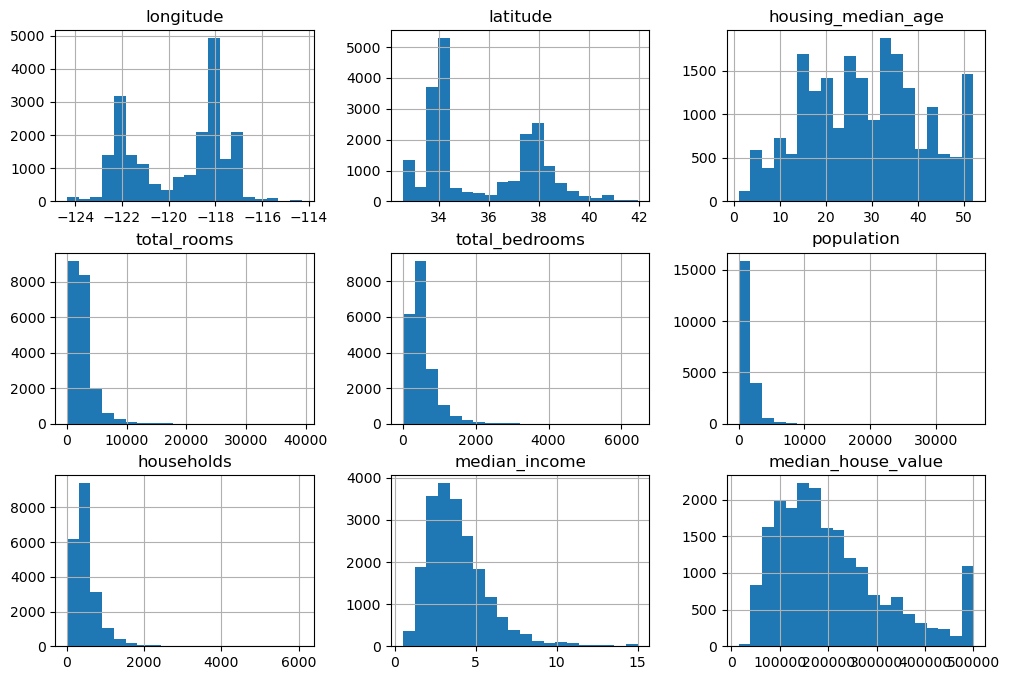

In [6]:
import matplotlib.pyplot as plt

housing.hist(bins=20, figsize=(12, 8))
plt.show()

In [7]:
# pure random test data split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

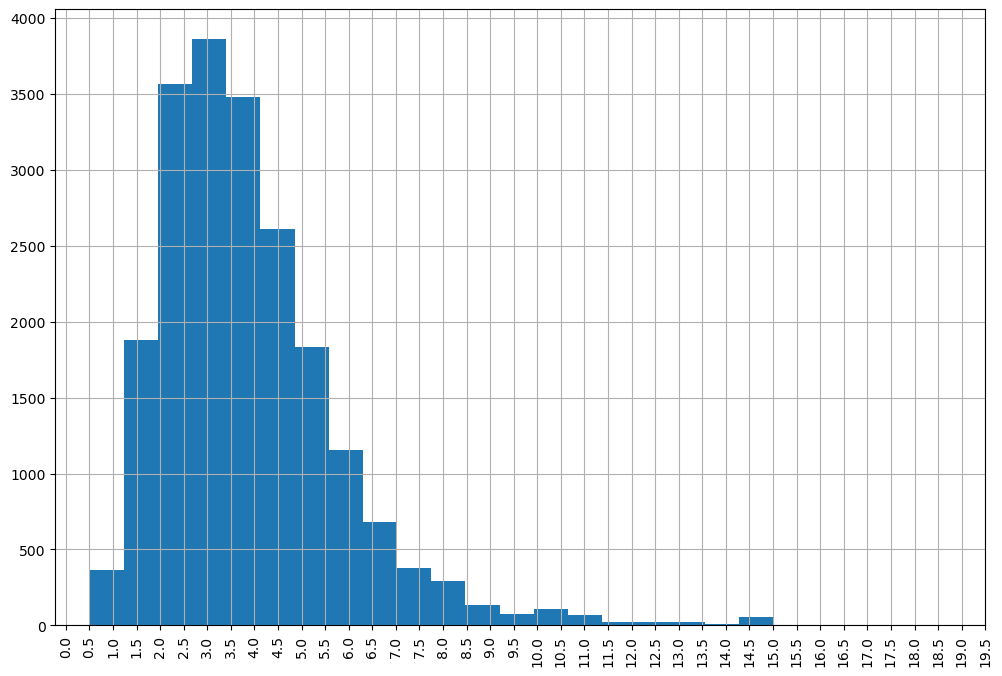

In [8]:
import numpy as np

housing["median_income"].hist(bins=20, figsize=(12, 8))

plt.xticks(np.arange(0, 20, step=0.5), rotation=90)
plt.show()

As from the graph above we see value '3.0' about in the mid so we chose bins around that. labels should be 1 less than bins

In [9]:
import pandas as pd

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)


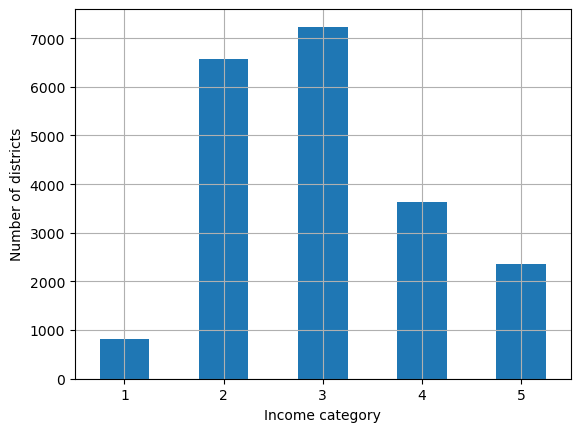

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

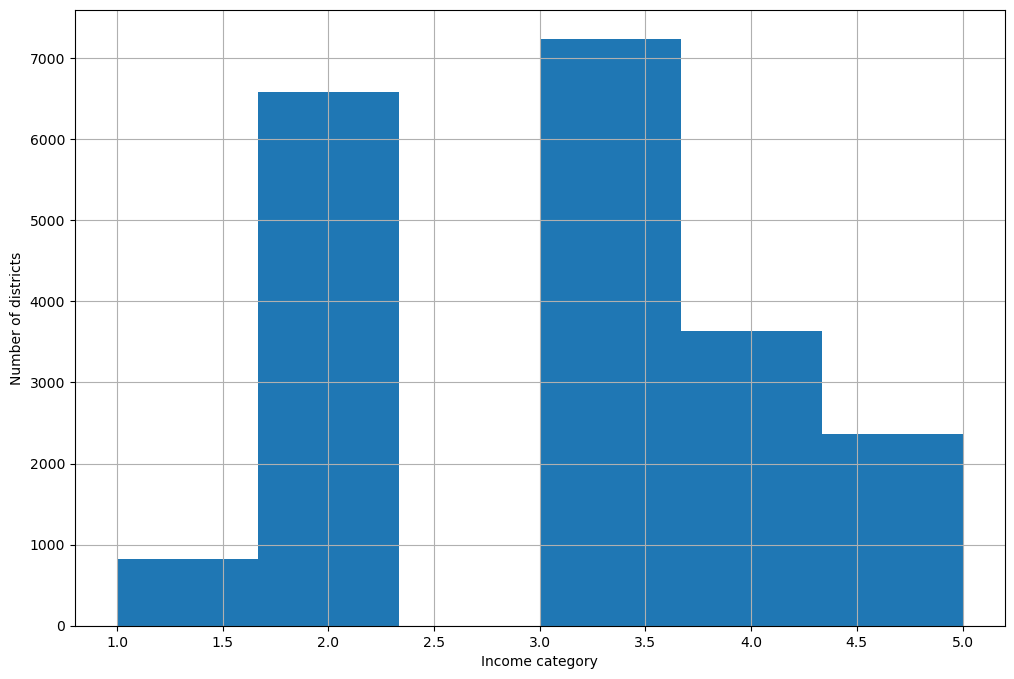

In [11]:
housing["income_cat"].hist(bins=6, figsize=(12, 8))
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [12]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

In [13]:
strat_test_set.drop("income_cat", axis="columns", inplace=True)

In [14]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)

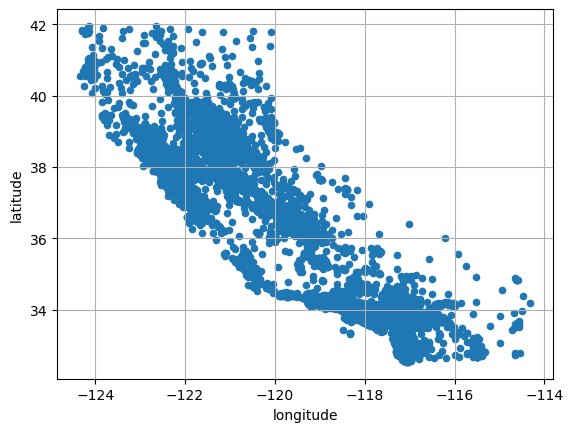

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

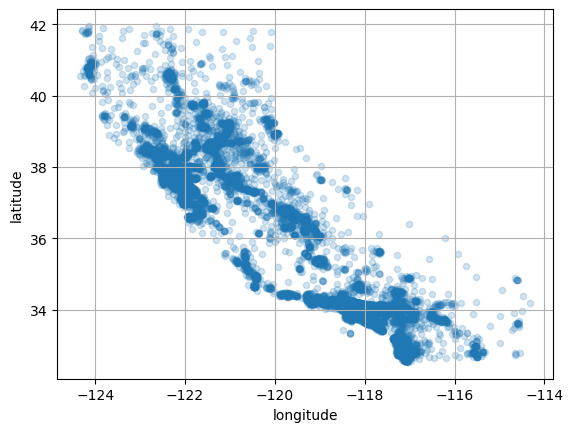

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

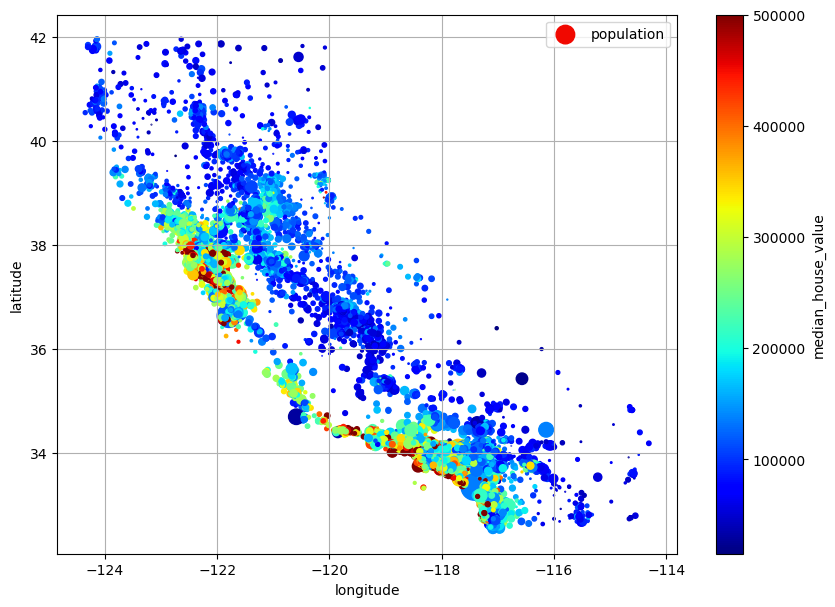

In [17]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="population",
    c="median_house_value",
    colormap="jet",
    figsize=(10, 7),
    sharex=False,
)
plt.show()

In [18]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

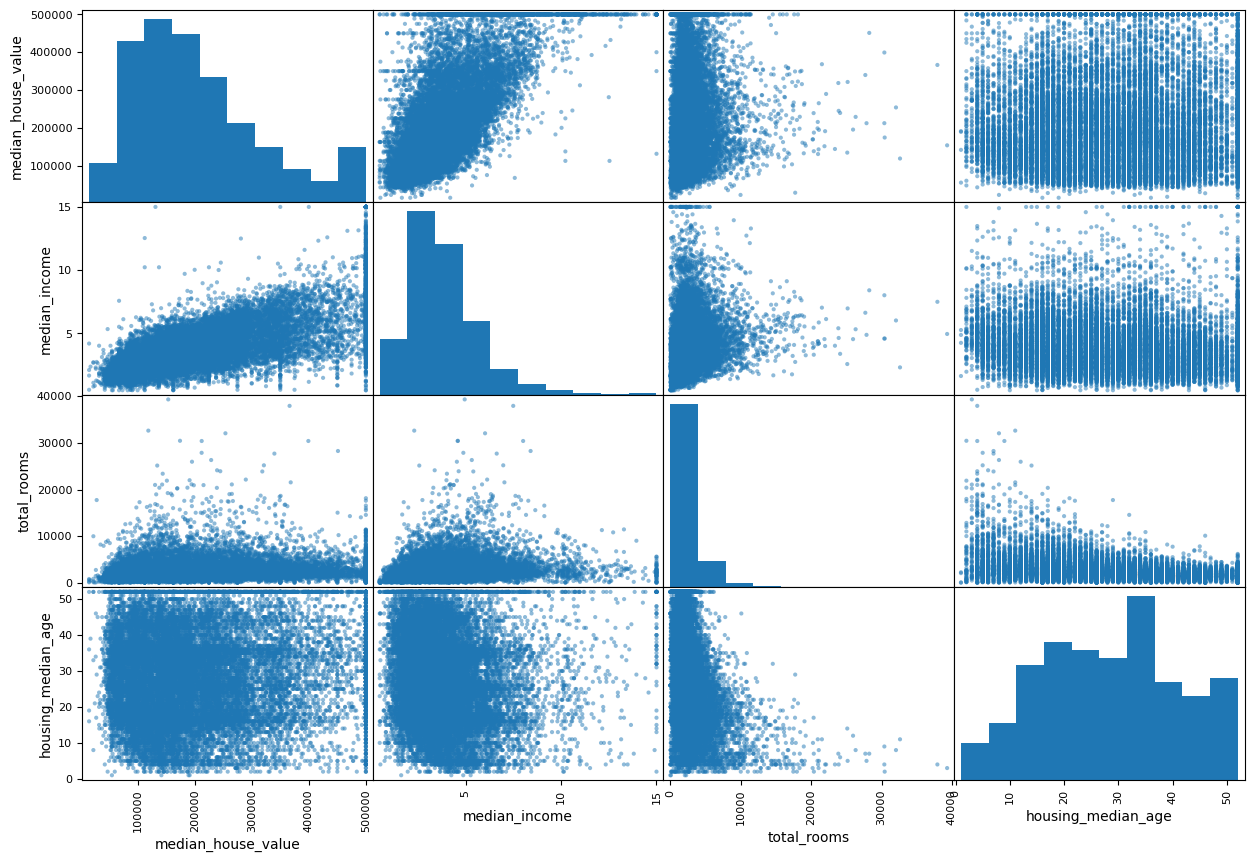

In [19]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]

scatter_matrix(housing[attributes], figsize=(15, 10))
plt.show()

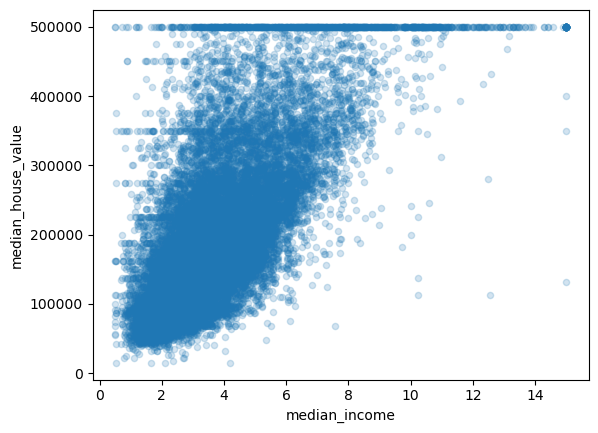

In [20]:
housing.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.2, grid=False
)
plt.show()

In [21]:
# create new features
# 1. number of rooms per house
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
# 2. ratio of bed rooms to total rooms
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
# 3. persons per house
housing["people_per_house"] = housing["population"] / housing["households"]

In [22]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_house', 'bedrooms_ratio', 'people_per_house'],
      dtype='object')

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_test_set["median_house_value"].copy()

In [25]:
housing_num = housing.select_dtypes("number")

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [27]:
# The imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X = imputer.transform(housing_num)
# X has neither columsn nor index
housing_tr = pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index)

In [28]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,537.881298,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,421.831667,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,297.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,642.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [29]:
housing_cat = housing[['ocean_proximity']]

In [30]:
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [31]:
# THe imputing contd.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [33]:
# sparse magtrix is very efficient for memories
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

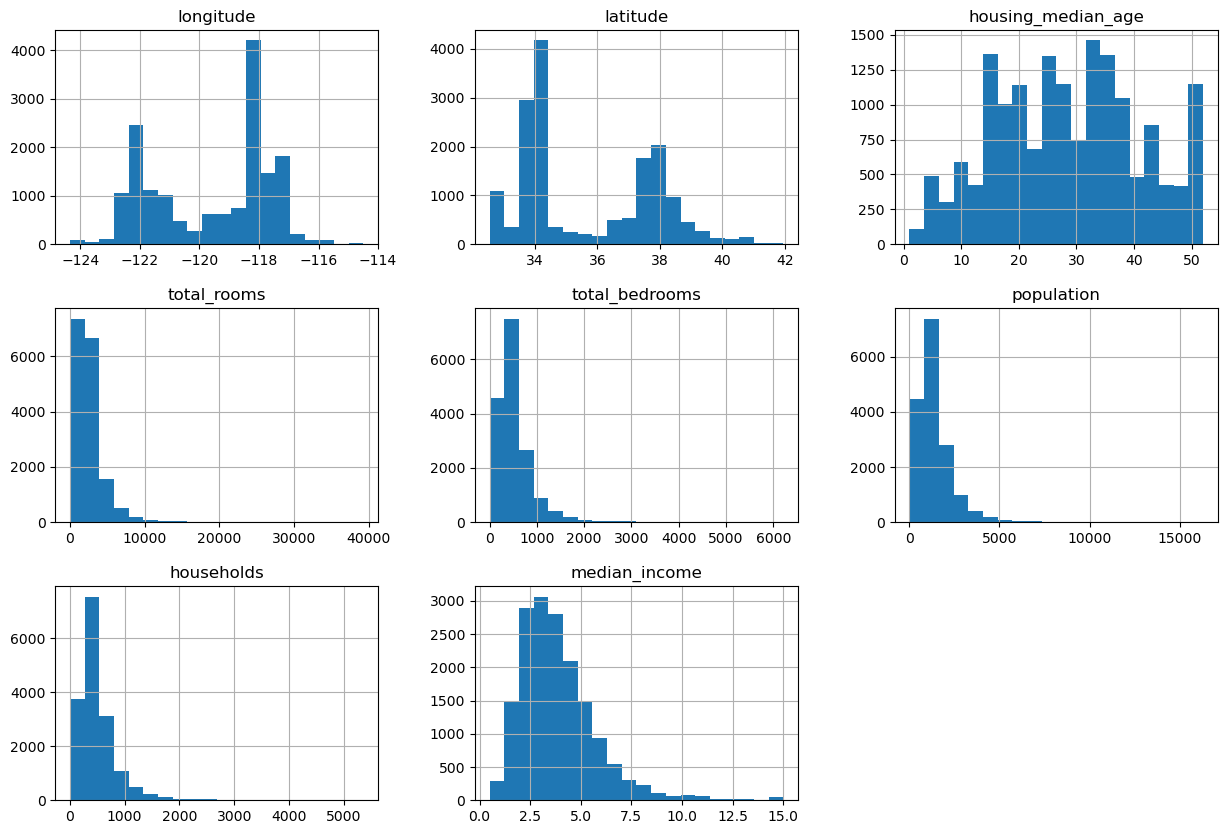

In [32]:
housing_tr.hist(bins= 20, figsize= (15,10))
plt.show()

Scaling

option 1 is min-max (aka normalization)

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled_df = pd.DataFrame(housing_num_min_max_scaled,index=housing_num.index, columns=housing_num.columns)

option 2 standarization -> values have mean of 0 and std of 1

In [39]:
from sklearn.preprocessing import StandardScaler

standard_scaller = StandardScaler()
housing_num_std_scaled = standard_scaller.fit_transform(housing_num)
housing_num_std_scaled_df = pd.DataFrame(housing_num_std_scaled, index= housing_num.index, columns= housing_num.columns)

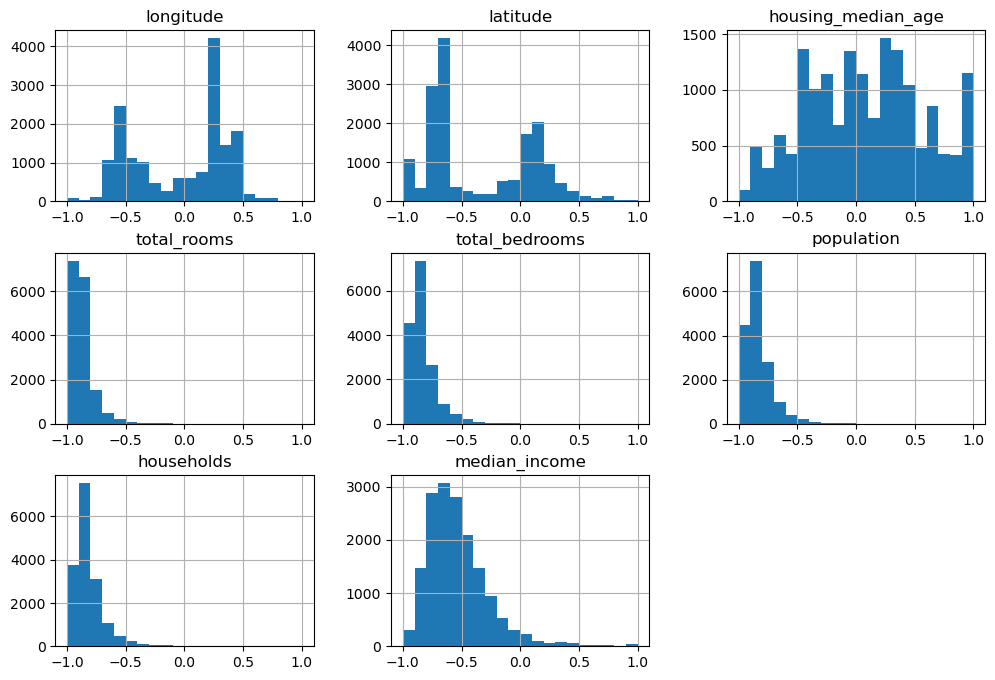

In [41]:
housing_num_min_max_scaled_df.hist(bins=20, figsize=(12, 8))
plt.show()

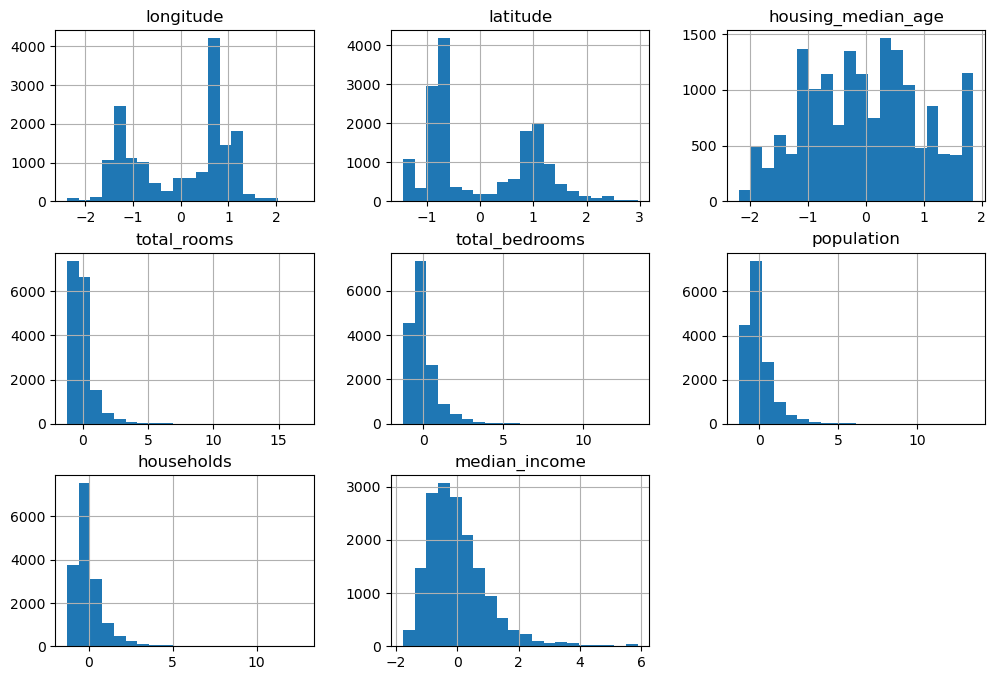

In [42]:
housing_num_std_scaled_df.hist(bins=20, figsize=(12, 8))
plt.show()

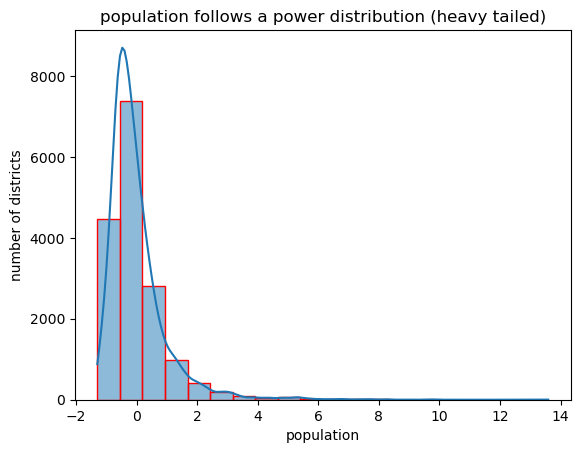

In [49]:
import seaborn as sns
sns.histplot(housing_num_std_scaled_df['population'],kde = True, bins=20, edgecolor='red', legend=True)
plt.figsize=(12, 8)
plt.title('population follows a power distribution (heavy tailed)')
plt.xlabel('population')
plt.ylabel('number of districts')
plt.show()

In [50]:
housing_num_std_scaled_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

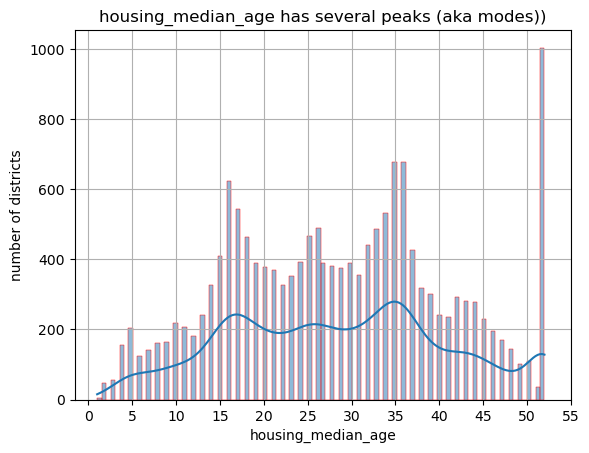

In [58]:
sns.histplot(housing_num['housing_median_age'],kde = True, bins=100, edgecolor='red', legend=True)
plt.figsize=(12, 8)
plt.title('housing_median_age has several peaks (aka modes))')
plt.grid(visible=True)
plt.xlabel('housing_median_age')
plt.xticks(np.arange(0,60,5))
plt.ylabel('number of districts')
plt.show()

The housing median age is multimodal so we can use an RBF which shows similarity to peak

In [60]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35_gamma_0_1 = rbf_kernel(housing_num[['housing_median_age']],[[35]], gamma=0.1)
age_simil_35_gamma_0_3 = rbf_kernel(housing_num[['housing_median_age']],[[35]], gamma=0.3)

age_simil_16_gamma_0_1 = rbf_kernel(housing_num[['housing_median_age']],[[16]], gamma=0.1)
age_simil_16_gamma_0_3 = rbf_kernel(housing_num[['housing_median_age']],[[16]], gamma=0.3)

age_simil_48_gamma_0_1 = rbf_kernel(housing_num[['housing_median_age']],[[48]], gamma=0.1)
age_simil_48_gamma_0_3 = rbf_kernel(housing_num[['housing_median_age']],[[48]], gamma=0.3)

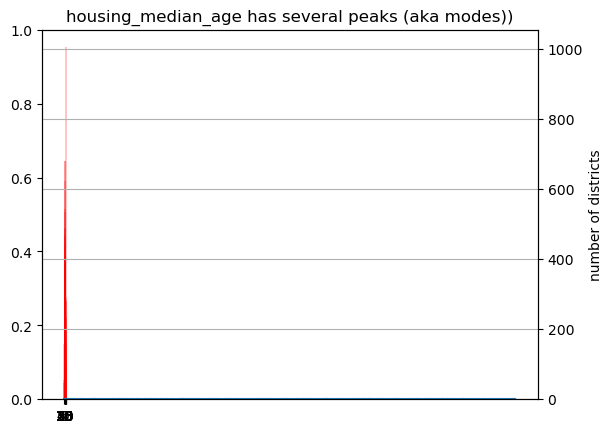

In [72]:
fig, ax1= plt.subplots()
ax2 = ax1.twinx()
ax1 = sns.histplot(housing_num['housing_median_age'], bins=100, edgecolor='red', legend=True)
ax2 = ax2.plot(age_simil_16_gamma_0_1)
plt.title('housing_median_age has several peaks (aka modes))')
plt.grid(visible=True)
plt.xlabel('housing_median_age')
plt.xticks(np.arange(0,60,5))
plt.ylabel('number of districts')
plt.show()
